**Loading relevant libraries**

In [1]:
import time
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from google.colab import files
import seaborn as sns
import pandas as pd
pd.options.display.max_rows = None
import matplotlib.pyplot as plt  
import math
from sklearn.utils import resample
from sklearn import preprocessing, utils, metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

**Mounting and reading of the file**

In [2]:
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/creditcard.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**i.a.**

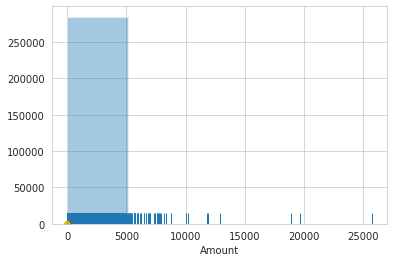

In [3]:
sns.set_style("whitegrid")
sns.distplot(df['Amount'],bins=5, kde=False, rug=True)
plt.plot(df['Amount'].mean(),0,'ro') #mean
plt.plot(df['Amount'].median(),0,'yo') #median
plt.show()

**i.b.**

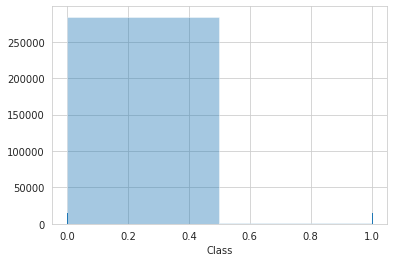

In [4]:
sns.distplot(df['Class'],bins=2, kde=False, rug=True)
sns.set_style("whitegrid")
plt.show()

**We can observe that this is a highly skewed dataset, since cases of credit card fraud are quite less and this might make our training model biased.**

**ii.**

In [5]:
df1 = df.drop(columns='Class')
df2 = df['Class']
x, x_test, y, y_test = train_test_split(df1,df2,test_size=0.25)
x_train, x_dev, y_train, y_dev = train_test_split(x,y,test_size = 0.33333) 
# Since, 0.33333 * 0.75 = 0.25

x_train.to_csv('x_train.csv') 
y_train.to_csv('y_train.csv')

x_test.to_csv('x_test.csv') 
y_test.to_csv('y_test.csv') 

x_dev.to_csv('x_dev.csv') 
y_dev.to_csv('y_dev.csv') 

**iii. EXP1**

In [6]:
time_start = time.clock()

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred = logisticRegr.predict(x_test)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[71022    47]
 [   35    98]]
F1 Score :  70.50359712230215
Accuracy :  99.88483469565462
Time :  6.8189189999999975


**iii. EXP2**

In [7]:
sample1 = x_train.copy()
sample1.drop(['Time', 'Amount'], axis=1, inplace=True)

sample2 = x_test.copy()
sample2.drop(['Time', 'Amount'], axis=1, inplace=True)

time_start = time.clock()

logisticRegr = LogisticRegression()
logisticRegr.fit(sample1, y_train)
y_pred = logisticRegr.predict(sample2)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[71056    13]
 [   43    90]]
F1 Score :  76.27118644067797
Accuracy :  99.92135052386169
Time :  3.693094000000002


**iii. EXP3**

In [8]:
sample3 = x_train.copy()
sample3.drop(['Time'], axis=1, inplace=True)

sample4 = x_test.copy()
sample4.drop(['Time'], axis=1, inplace=True)

time_start = time.clock()

logisticRegr = LogisticRegression()
logisticRegr.fit(sample3, y_train)
y_pred = logisticRegr.predict(sample4)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[71057    12]
 [   55    78]]
F1 Score :  69.95515695067265
Accuracy :  99.90590151962023
Time :  7.069481000000003


**iv. I would recommend using PCA reduced features(EXP2) as they helped us achieve a good amount of accuracy and took least amount of computation time.**

**v. Sampling of the dataset**

In [16]:
X = pd.concat([x_train, y_train], axis=1)

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

fraud_upsampled = resample(fraud,replace=True, n_samples=len(not_fraud)) 

upsampled = pd.concat([not_fraud, fraud_upsampled])

y_train_sample = upsampled.Class
x_train_sample = upsampled.drop('Class', axis=1)

x_train_sample.to_csv('x_train_sample.csv') 
y_train_sample.to_csv('y_train_sample.csv')

**vi. EXP1**

In [10]:
time_start = time.clock()

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_sample, y_train_sample)
y_pred = logisticRegr.predict(x_test)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[67912  3157]
 [   16   117]]
F1 Score :  6.868212503668916
Accuracy :  95.54366450380607
Time :  6.234376999999995


**vi. EXP2**

In [11]:
sample5 = x_train_sample.copy()
sample5.drop(['Time', 'Amount'], axis=1, inplace=True)

time_start = time.clock()

logisticRegr = LogisticRegression()
logisticRegr.fit(sample5, y_train_sample)
y_pred = logisticRegr.predict(sample2)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[69110  1959]
 [   10   123]]
F1 Score :  11.10609480812641
Accuracy :  97.23462824077976
Time :  6.216319999999996


**vi. EXP3**

In [12]:
sample6 = x_train_sample.copy()
sample6.drop(['Time'], axis=1, inplace=True)

time_start = time.clock()

logisticRegr = LogisticRegression()
logisticRegr.fit(sample6, y_train_sample)
y_pred = logisticRegr.predict(sample4)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[69019  2050]
 [   10   123]]
F1 Score :  10.667823070251519
Accuracy :  97.106822842055
Time :  12.696257999999993


**I would still recommend using PCA reduced features (EXP2) after sampling of the data due to the same reason above i.e very good speed with comparable accuracy.**

**vii. EXP1**

In [13]:
time_start = time.clock()

rfc = RandomForestClassifier()
rfc.fit(x_train_sample, y_train_sample)
y_pred = rfc.predict(x_test)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[71063     6]
 [   29   104]]
F1 Score :  85.59670781893004
Accuracy :  99.95084407741356
Time :  94.06369900000001


**vii. EXP2**

In [14]:
time_start = time.clock()

rfc = RandomForestClassifier()
rfc.fit(sample5, y_train_sample)
y_pred = rfc.predict(sample2)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[71063     6]
 [   29   104]]
F1 Score :  85.59670781893004
Accuracy :  99.95084407741356
Time :  93.660078


**vii. EXP3**

In [15]:
time_start = time.clock()

rfc = RandomForestClassifier()
rfc.fit(sample6, y_train_sample)
y_pred = rfc.predict(sample4)

print ("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("F1 Score : ",f1_score(y_test, y_pred)*100.0)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100.0) 

time_elapsed = (time.clock() - time_start)
print("Time : ",time_elapsed)

Confusion Matrix : 
 [[71063     6]
 [   29   104]]
F1 Score :  85.59670781893004
Accuracy :  99.95084407741356
Time :  93.47590100000002
